# <span style="color:red">Lezione 3</span>

### C++ Code

* 3.1
Il codice è basato sulla programmazione ad oggetti:
    - `funzioni.h`, contiene funzioni per creare il generatore rnd, scrittura, d, N e per stampare i parametri
    - `finance.h` classe che contiene i set per i parametri del mercato, i metodi calcolare `S(t)` "direttamente" e "discretamente", `Put` e `Call` europee.
    - `experimet.h` contiene i metodi per calcolare la media a blocchi progressiva con le incertezze (`Block_prog_ave_print(array_misure,"name",# blocks, mis for blk)`).
    
Tutti i file di output sono contenuti in `data`. Essi sono `E(P/C)_(direct/discret).dat` e sono così composti:

1° colonna|2° colonna|3° colonna
----------|----------|----------
number of the blk|E(P/C) value|inc E(P/C) value

## <span style="color:green">Esercizio 3.1</span>

### Python Code

Definisco funzioni per la lettura e i plot. I dati sono caricati dagli output del codice C++. I dati sono confrontati con i valori analitici.

#### <span style="color:blue">Analitic solution</span>

In [3]:
import scipy
from scipy.special import erf
from numpy import log, exp, sqrt

# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ==")
    print("call: ", call)
    print("put: ", put)

 == BLACK-SCHOLES ==
call:  14.975790778311286
put:  5.4595325819072364


#### <span style="color:blue">Estimation of the European (call/put)-option</span>

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import math
# read
def read(option):
    n, E, errE = np.loadtxt("3.1/data/"+option+".dat",usecols=(0,1,2), delimiter=' ', unpack='true')
    return n, E, errE
# plot
def plot():
    option = ['EC_direct','EC_discret','EP_direct','EP_discret']
    # analitic solution
    call, put = black_scholes(S0, K, T, r, sigma)
    value = [call,put]
    h=0
    L=100
    # Definisco le dimensioni del grafico
    fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(14,8),gridspec_kw=dict(wspace=0.16, hspace=0.4))
    # Il "for" per creare i tre grafici più il fitting sull'ultimo vettore v100
    for i in range(2):
        for j in range (2):
            n, E, errE = read(option[h])
            ax[i,j].errorbar(n, E, yerr=errE, color='blue', ecolor='orange', label=''+option[h])
            ax[i,j].axhline(y=value[i], color='r', linestyle='-', label=f'Analitic solution')
            ax[i,j].set_xlabel(f'# blocks (N={int(n[-1]+1)})')
            ax[i,j].set_ylabel(f''+option[h])
            ax[i,j].set_title(option[h]+f'\'s average values: blocks={int(n[-1]+1)}, nmis in each blk={L}')
            ax[i,j].grid(True)
            ax[i,j].legend()
            h+=1
    plt.show()

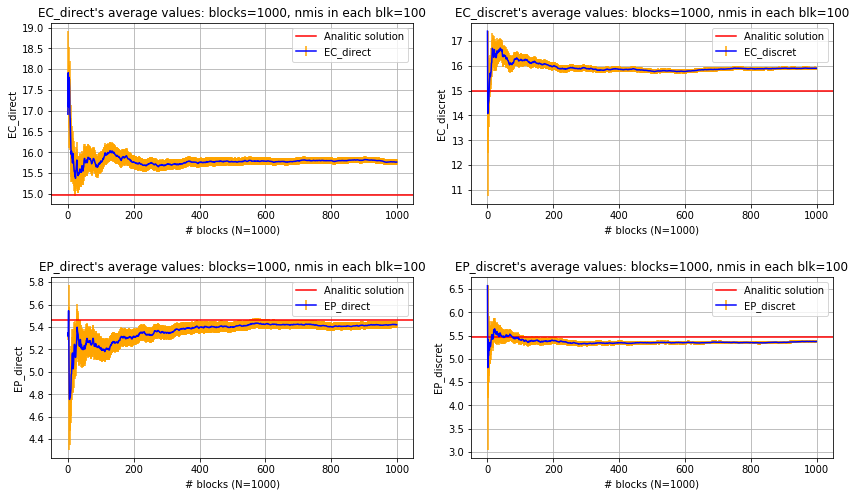

In [17]:
plot()